# Project 2 - Supervised Machine Learning : Regression

Data source: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Data Description

In [62]:
# Data source: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/
data = pd.read_csv('data project/CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [64]:
data['symboling']=data['symboling'].astype('object')

In [65]:
categoric_df = data[['symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']]
numeric_df = data[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]

In [66]:
categoric_df.info()
categoric_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   symboling       205 non-null    object
 1   CarName         205 non-null    object
 2   fueltype        205 non-null    object
 3   aspiration      205 non-null    object
 4   doornumber      205 non-null    object
 5   carbody         205 non-null    object
 6   drivewheel      205 non-null    object
 7   enginelocation  205 non-null    object
 8   enginetype      205 non-null    object
 9   cylindernumber  205 non-null    object
 10  fuelsystem      205 non-null    object
dtypes: object(11)
memory usage: 17.7+ KB


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205,205
unique,6,147,2,2,2,5,3,2,7,7,8
top,0,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,67,6,185,168,115,96,120,202,148,159,94


In [67]:
numeric_df.info()
round(numeric_df.describe(),2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
 13  price             205 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 22.6 KB


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [68]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

The data has 11 categorical variables and 14 numerical variables, and it seems the data doesn't has missing value on it. So it's great to go!

# Exploratory Data Analysis

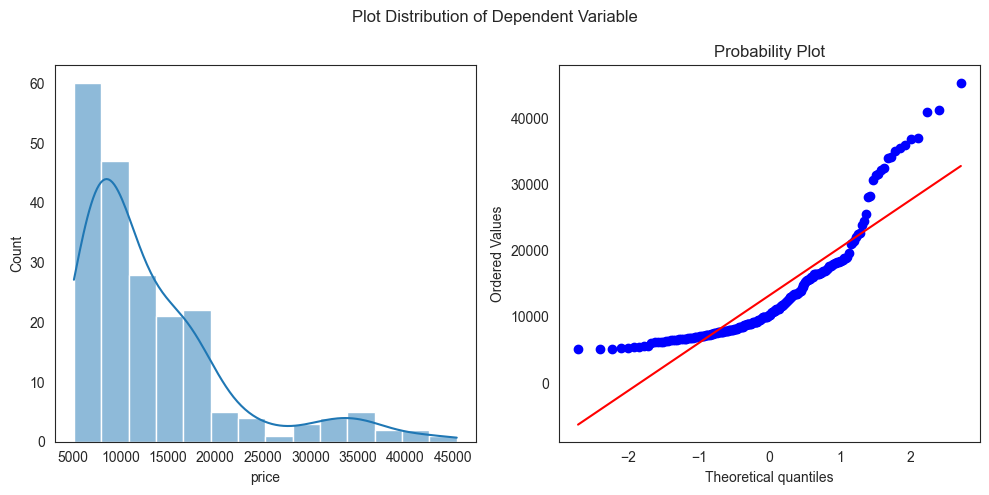

Skewness : 1.7776781560914454
Kurtosis : 3.051647871396399
P-Value (K-S) : 0.0


In [69]:
# Plotting the distribution of the dependent variable
import scipy.stats as stats

fig, axes = plt.subplots(1,2, figsize=(10,5))
#plt.subplots_adjust(wspace=0.5)
plt.suptitle('Plot Distribution of Dependent Variable')

stats.probplot(data['price'], plot=plt)
sns.histplot(data['price'],kde=True, ax=axes[0])
plt.tight_layout()
plt.show()

print(f'Skewness : {data["price"].skew()}')
print(f'Kurtosis : {data["price"].kurt()}')
print(f'P-Value (K-S) : {stats.kstest(data["price"], "norm")[1]}')

The dependent variable is not in normal distribution

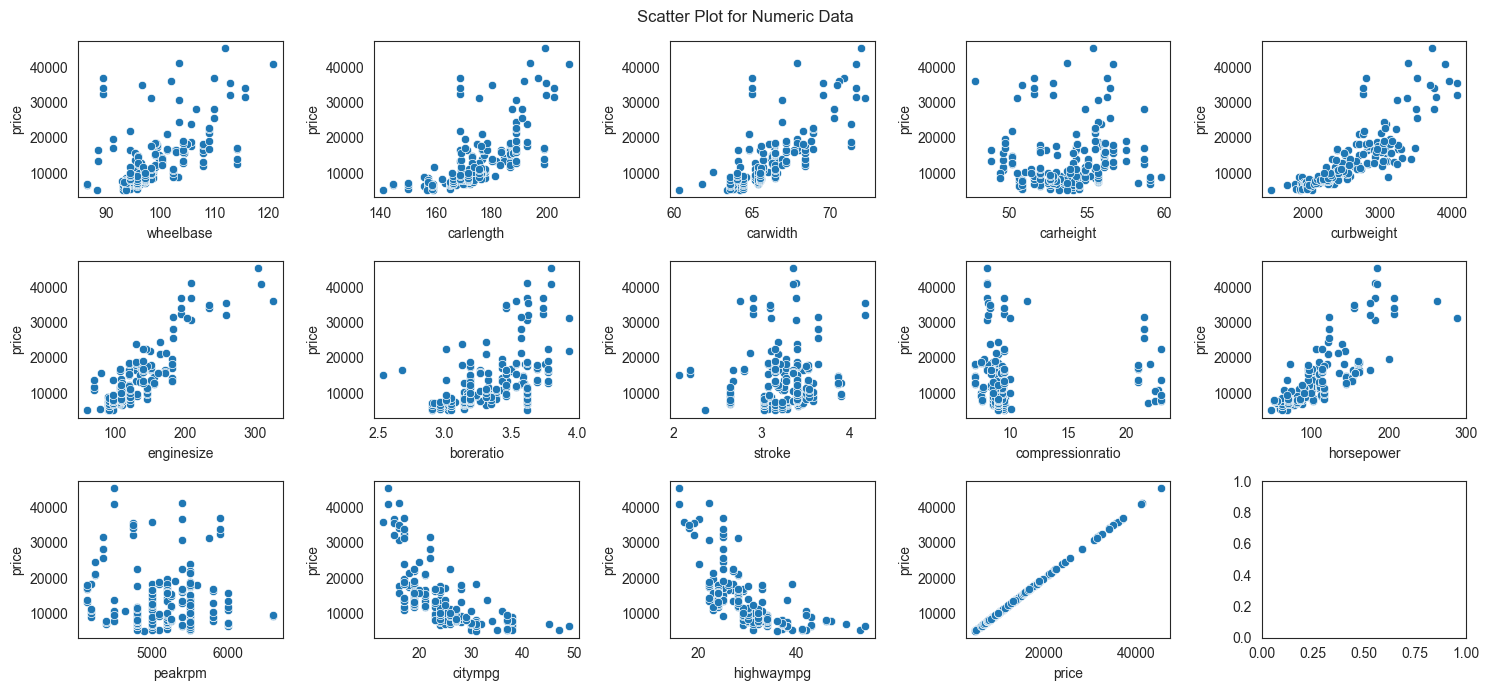

In [70]:
fig, axes = plt.subplots(3,5, figsize=(15,7), sharey= False)
plt.suptitle("Scatter Plot for Numeric Data")
#plt.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, column in enumerate(numeric_df.columns[:]):
    sns.scatterplot(x=column, y='price',data=numeric_df, ax=axes[i])

plt.tight_layout()

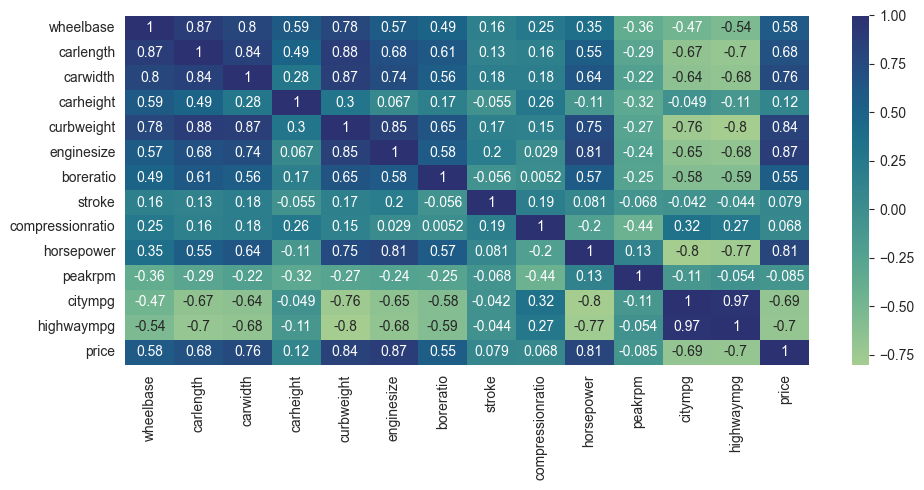

In [71]:
plt.figure(figsize=(10,5))
sns.heatmap(numeric_df.corr(), cmap='crest', annot=True)
plt.tight_layout()

It can be seen that some variables has a high correlation with the dependent variable, but the variable `peakrpm`, `compressionratio`, and `stroke` have very low correlation.

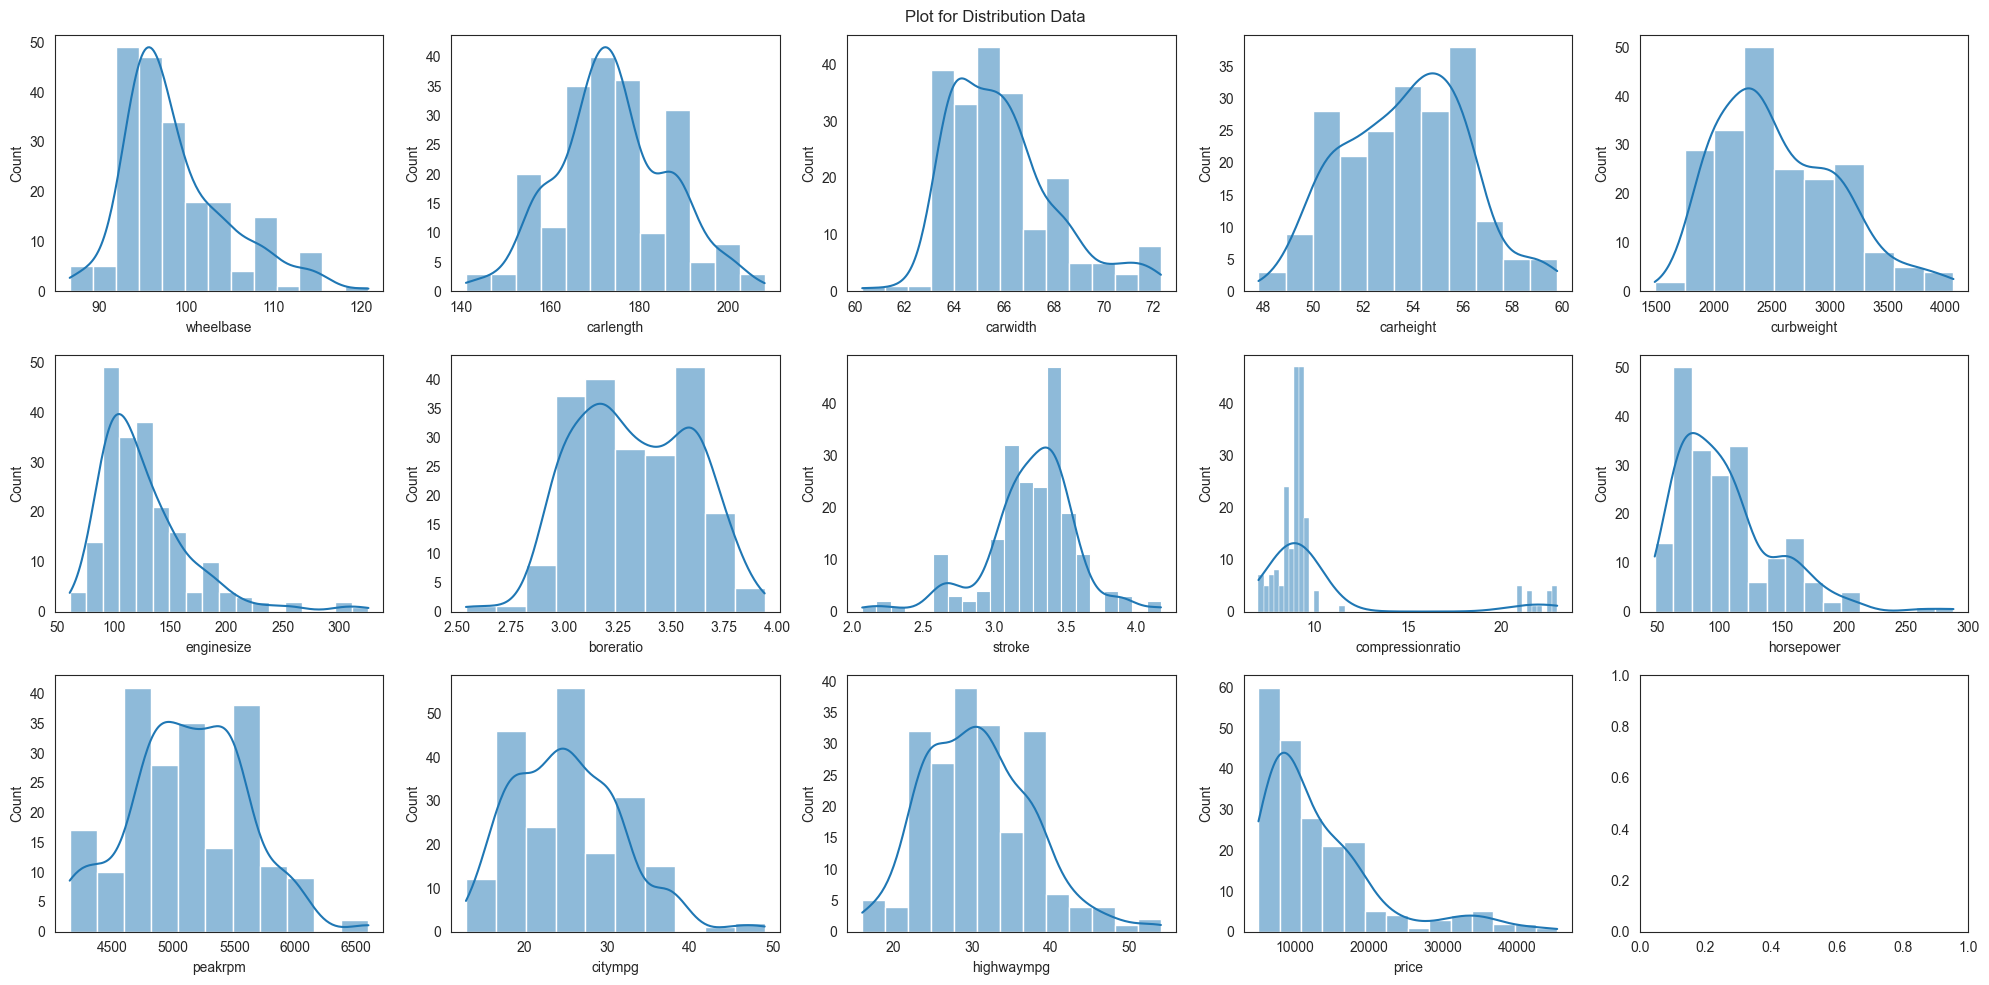

In [72]:
fig, axes = plt.subplots(3,5, figsize=(20,10), sharey= False)
plt.suptitle("Plot for Distribution Data")
#plt.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, column in enumerate(numeric_df.columns):
    sns.histplot(x=column, data=numeric_df, ax=axes[i],kde=True)

plt.tight_layout()

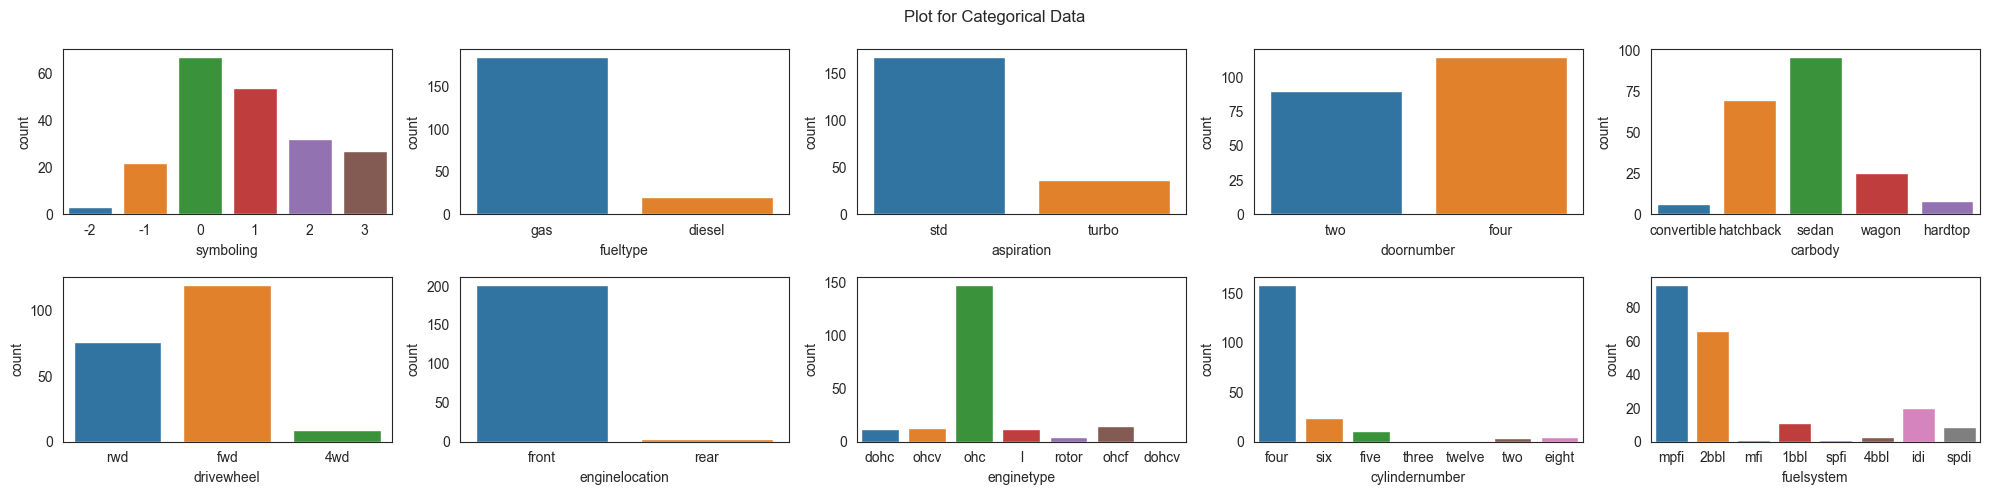

In [73]:
fig, axes = plt.subplots(2,5, figsize=(20,5), sharey= False)
plt.suptitle("Plot for Categorical Data")
#plt.subplots_adjust(hspace=0.5)

categoric_df2 = categoric_df.drop('CarName', axis=1)

axes = axes.flatten()

for i, column in enumerate(categoric_df2.columns):
    sns.countplot(x=column, data=categoric_df2, ax=axes[i])

plt.tight_layout()

# Feature Engineering

Convert categorical data to binary.

In [74]:
from sklearn.preprocessing import OneHotEncoder

ohc = OneHotEncoder(sparse=False)
dummies_df = pd.DataFrame(ohc.fit_transform(categoric_df2), columns=ohc.get_feature_names_out())
dummies_df

C:\Users\zidan\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [75]:
categoric_df2.columns.values

array(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'], dtype=object)

In [76]:
ohc.get_feature_names_out()

array(['symboling_-2', 'symboling_-1', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype=object)

Transforming dependent variables

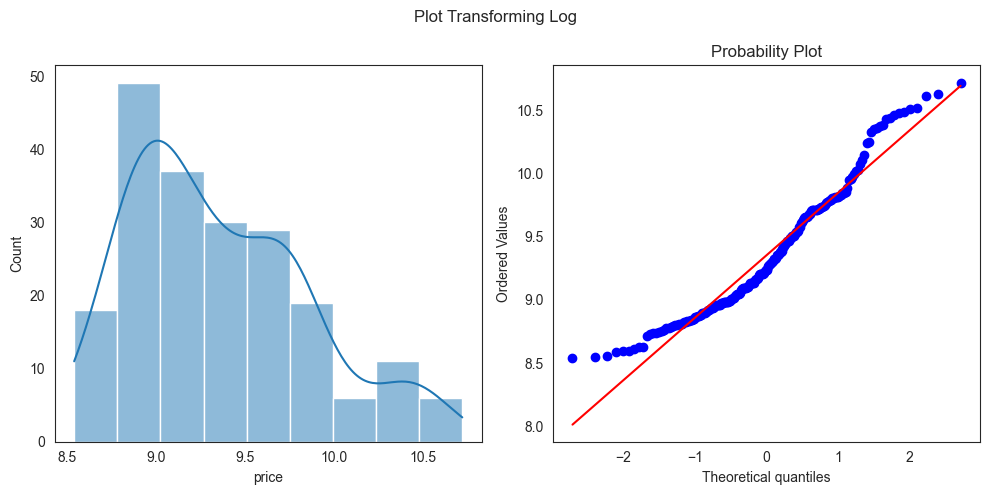

P-Value : 0.0


In [77]:
# Plotting the distribution of the dependent variable
import scipy.stats as stats

fig, axes = plt.subplots(1,2, figsize=(10,5))
#plt.subplots_adjust(wspace=0.5)
plt.suptitle('Plot Transforming Log')

y_log = np.log(data['price'])

stats.probplot(y_log, plot=plt)
sns.histplot(y_log,kde=True, ax=axes[0])
plt.tight_layout()
plt.show()

print(f'P-Value : {stats.kstest(y_log,"norm")[1]}')

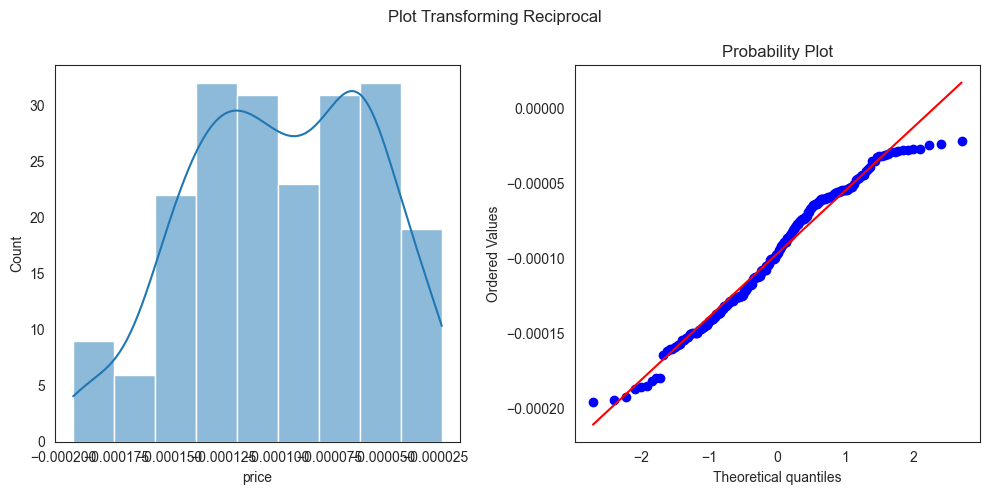

P-Value : 6.438497839806477e-48


In [78]:
# Plotting the distribution of the dependent variable
import scipy.stats as stats

fig, axes = plt.subplots(1,2, figsize=(10,5))
#plt.subplots_adjust(wspace=0.5)
plt.suptitle('Plot Transforming Reciprocal')

y_1 = -1/data['price']

stats.probplot(y_1, plot=plt)
sns.histplot(y_1,kde=True, ax=axes[0])
plt.tight_layout()
plt.show()

print(f'P-Value : {stats.kstest(y_1,"norm")[1]}')

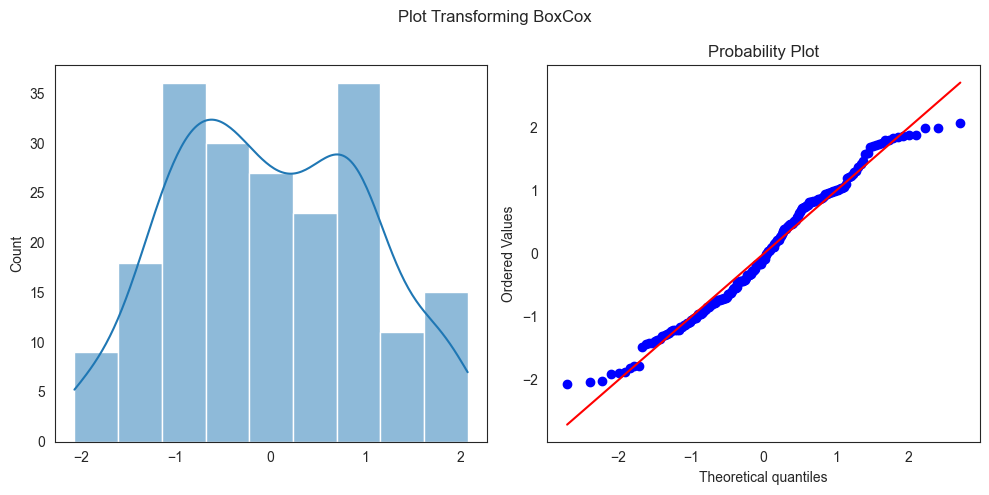

P-Value : 0.3020244457818557
Lambda : [-0.62808096]


In [79]:
# Plotting the distribution of the dependent variable
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats

fig, axes = plt.subplots(1,2, figsize=(10,5))
#plt.subplots_adjust(wspace=0.5)
plt.suptitle('Plot Transforming BoxCox')

pt = PowerTransformer(method='box-cox')
y_boxcox = pt.fit_transform(np.array(data['price']).reshape(-1,1)).flatten()

stats.probplot(y_boxcox, plot=plt)
sns.histplot(y_boxcox,kde=True, ax=axes[0])
plt.tight_layout()
plt.show()

print(f'P-Value : {stats.kstest(y_boxcox,"norm")[1]}')
print(f'Lambda : {pt.lambdas_}')

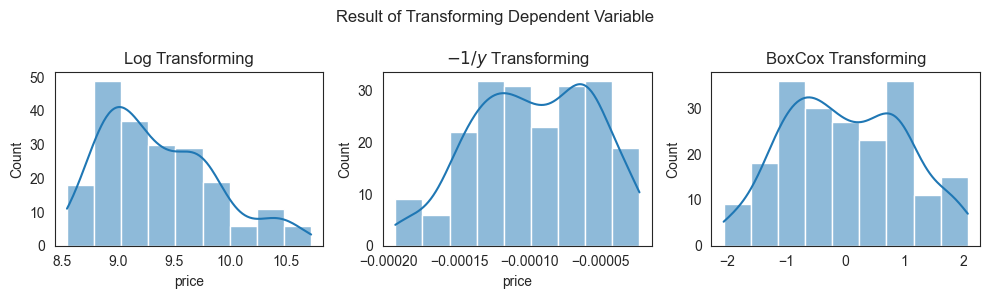

,Method,P-Value
0,Log,0.000
1,-1/y,0.000
2,BoxCox,0.302


In [80]:
fig, axes = plt.subplots(1,3, figsize=(10,3))
plt.suptitle('Result of Transforming Dependent Variable')

sns.histplot(y_log, kde=True, ax=axes[0])
axes[0].set_title('Log Transforming')

sns.histplot(y_1, kde=True, ax=axes[1])
axes[1].set_title('$-1/y$ Transforming')

sns.histplot(y_boxcox, kde=True, ax=axes[2])
axes[2].set_title('BoxCox Transforming')

pvalue_df = pd.DataFrame({'Method' : ['Log', '-1/y', 'BoxCox'],
                          'P-Value' : [0.000,0.000,0.302]})

plt.tight_layout()
plt.show()
display(pvalue_df)

In [81]:
X = pd.concat([numeric_df.drop('price', axis=1), dummies_df], axis=1)
X

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Modelling

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y_boxcox, test_size=.3, random_state=42)

### Baseline Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold


lr = LinearRegression(fit_intercept=True)
lr.fit(X,y_boxcox)

kfold = KFold(n_splits=4, shuffle=True, random_state=42)
rmse_scores_lr = np.sqrt(-cross_val_score(lr, X, y_boxcox, cv=kfold, scoring='neg_mean_squared_error'))
lr_r2 = lr.score(X,y_boxcox)
print("R^2: ", lr_r2)
print("RMSE scores:", rmse_scores_lr)
print("Mean RMSE:", rmse_scores_lr.mean())


R^2:  0.9273104671005453
RMSE scores: [0.38105016 0.37823469 0.35377234 0.38250705]
Mean RMSE: 0.3738910617512583


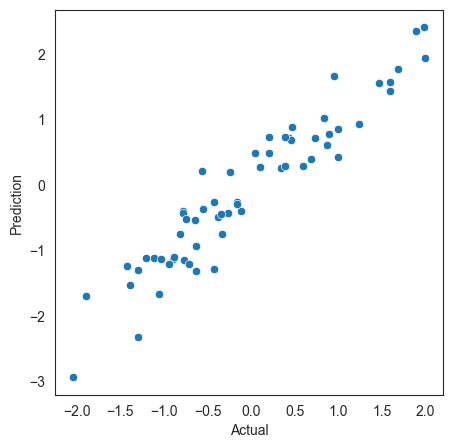

RMSE : 0.36848104390970576


In [112]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test,y=y_pred_lr)
plt.xlabel('Actual')
plt.ylabel('Prediction')
#plt.tight_layout()
plt.show()

rmse_test_lr = np.sqrt(mean_squared_error(y_pred_lr, y_test))
print(f'RMSE : {rmse_test_lr}')

### Polynomial Linear Regression

In [85]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

lr = LinearRegression(fit_intercept=True)
lr.fit(X_poly,y_boxcox)

kfold = KFold(n_splits=4, shuffle=True, random_state=42)
rmse_scores_poly = np.sqrt(-cross_val_score(lr, X_poly, y_boxcox, cv=kfold, scoring='neg_mean_squared_error'))
lr_poly_r2 = lr.score(X_poly,y_boxcox)
print("R^2: ", lr_poly_r2)
print("RMSE scores:", rmse_scores_poly)
print("Mean RMSE:", rmse_scores_poly.mean())


R^2:  0.9957447939674676
RMSE scores: [9.69514805e+02 1.82351007e+05 5.77679331e+01 4.36480230e+02]
Mean RMSE: 45953.69240560229


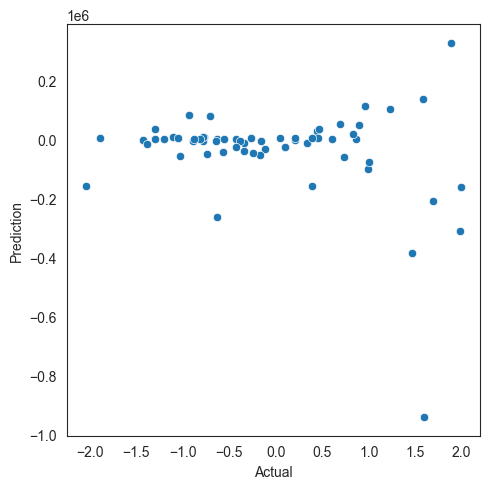

RMSE : 156560.93660299678


In [113]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

lr = LinearRegression(fit_intercept=True)
lr.fit(X_poly_train,y_train)

y_pred_poly = lr.predict(X_poly_test)

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test,y=y_pred_poly)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.tight_layout()
plt.show()

rmse_test_poly = np.sqrt(mean_squared_error(y_pred_poly, y_test))
print(f'RMSE : {rmse_test_poly}')

### Lasso Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import optuna

def objective(trial):
    params = {
        "alpha" : trial.suggest_float('alpha',0,100)
    }

    lasso = Lasso(**params)
    lasso.fit(X, y_boxcox)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_scores = np.sqrt(-cross_val_score(lasso, X, y_boxcox, cv=kfold, scoring='neg_mean_squared_error'))
    return rmse_scores.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)
best_params_lasso_lr = study.best_params
best_params_lasso_lr

[I 2024-01-08 17:16:00,928] A new study created in memory with name: no-name-ba93a2bc-95d5-4004-8801-45a2e6b95358
[I 2024-01-08 17:16:00,960] Trial 0 finished with value: 0.43562094254232253 and parameters: {'alpha': 8.087452964752085}. Best is trial 0 with value: 0.43562094254232253.
[I 2024-01-08 17:16:00,993] Trial 1 finished with value: 0.4440907761546945 and parameters: {'alpha': 32.08659744147284}. Best is trial 0 with value: 0.43562094254232253.
[I 2024-01-08 17:16:01,026] Trial 2 finished with value: 0.42250308695996 and parameters: {'alpha': 1.9805445693335422}. Best is trial 2 with value: 0.42250308695996.
[I 2024-01-08 17:16:01,050] Trial 3 finished with value: 0.4356770276393295 and parameters: {'alpha': 4.873422928829829}. Best is trial 2 with value: 0.42250308695996.
[I 2024-01-08 17:16:01,083] Trial 4 finished with value: 0.47424493035759313 and parameters: {'alpha': 71.16939459641127}. Best is trial 2 with value: 0.42250308695996.
[I 2024-01-08 17:16:01,107] Trial 5 fin

{'alpha': 0.0036696850832181275}

In [88]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

lasso = Lasso(**best_params_lasso_lr)
lasso.fit(X,y_boxcox)

kfold = KFold(n_splits=4, shuffle=True, random_state=42)
rmse_scores_lasso = np.sqrt(-cross_val_score(lasso, X, y_boxcox, cv=kfold, scoring='neg_mean_squared_error'))
lasso_r2 = lasso.score(X,y_boxcox)
print("R^2: ", lasso_r2)
print("RMSE scores:", rmse_scores_lasso)
print("Mean RMSE:", rmse_scores_lasso.mean())

R^2:  0.9190759509632609
RMSE scores: [0.34494462 0.35785994 0.34471434 0.33327068]
Mean RMSE: 0.34519739268144656


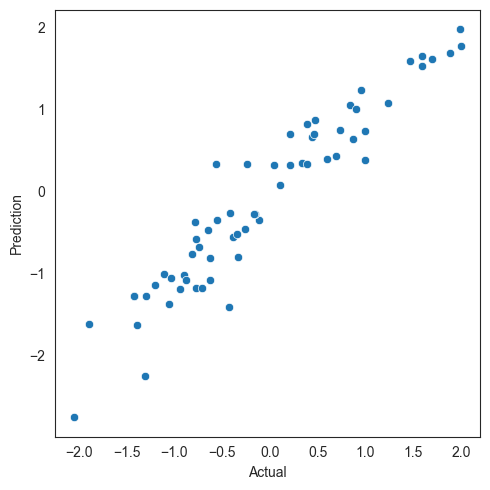

RMSE : 0.33398862769025334


In [114]:
lasso = Lasso(**best_params_lasso_lr)
lasso.fit(X_train,y_train)

y_pred_lasso = lasso.predict(X_test)

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test,y=y_pred_lasso)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.tight_layout()
plt.show()

rmse_test_lasso = np.sqrt(mean_squared_error(y_pred_lasso, y_test))
print(f'RMSE : {rmse_test_lasso}')

### Lasso Polynomial Regression

In [90]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import optuna

def objective(trial):
    params = {
        "alpha" : trial.suggest_float('alpha',0,100),
        'max_iter' : 1000
    }

    lasso = Lasso(**params)
    lasso.fit(X_poly, y_boxcox)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_scores = np.sqrt(-cross_val_score(lasso, X_poly, y_boxcox, cv=kfold, scoring='neg_mean_squared_error'))
    return rmse_scores.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
best_params_lasso_lr_poly = study.best_params
best_params_lasso_lr_poly

[I 2024-01-08 17:16:42,519] A new study created in memory with name: no-name-bb22e7e4-3726-4cb9-8701-5f99a63b3a74
C:\Users\zidan\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.091e+00, tolerance: 2.050e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\zidan\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.767e+00, tolerance: 1.649e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\zidan\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did

{'alpha': 46.31611723780748}

In [91]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

lasso = Lasso(**best_params_lasso_lr_poly)
lasso.fit(X_poly,y_boxcox)

kfold = KFold(n_splits=4, shuffle=True, random_state=42)
rmse_scores_lasso_poly = np.sqrt(-cross_val_score(lasso, X_poly, y_boxcox, cv=kfold, scoring='neg_mean_squared_error'))
lasso_poly_r2 = lasso.score(X_poly,y_boxcox)
print("R^2: ", lasso_poly_r2)
print("RMSE scores:", rmse_scores_lasso_poly)
print("Mean RMSE:", rmse_scores_lasso_poly.mean())

C:\Users\zidan\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.884e+00, tolerance: 2.050e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\zidan\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.124e+00, tolerance: 1.545e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\zidan\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

R^2:  0.9711617212675456
RMSE scores: [0.76234581 0.43527632 0.4671957  0.87320495]
Mean RMSE: 0.6345056948880022


C:\Users\zidan\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.448e+00, tolerance: 1.451e-02
  model = cd_fast.enet_coordinate_descent(


C:\Users\zidan\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.888e+00, tolerance: 1.434e-02



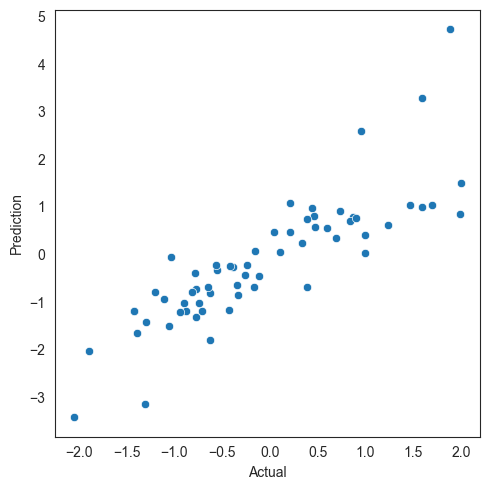

RMSE : 0.7115543163954181


In [115]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

lasso = Lasso(**best_params_lasso_lr_poly)
lasso.fit(X_poly_train,y_train)

y_pred_poly_ls = lasso.predict(X_poly_test)

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test,y=y_pred_poly_ls)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.tight_layout()
plt.show()

rmse_test_lasso_poly = np.sqrt(mean_squared_error(y_pred_poly_ls, y_test))
print(f'RMSE : {rmse_test_lasso_poly}')

### Ridge Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import optuna

def objective(trial):
    params = {
        "alpha" : trial.suggest_float('alpha',0,100),
        'solver' : 'lsqr'
    }

    ridge = Ridge(**params)
    ridge.fit(X, y_boxcox)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_scores = np.sqrt(-cross_val_score(ridge, X, y_boxcox, cv=kfold, scoring='neg_mean_squared_error'))
    return rmse_scores.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)
best_params_ridge_lr = study.best_params
best_params_ridge_lr

[I 2024-01-08 17:29:11,553] A new study created in memory with name: no-name-94b944b4-50e8-489a-94dd-198210bc854b
[I 2024-01-08 17:29:11,610] Trial 0 finished with value: 0.3679795258384163 and parameters: {'alpha': 28.876210071417052}. Best is trial 0 with value: 0.3679795258384163.
[I 2024-01-08 17:29:11,659] Trial 1 finished with value: 0.36316790983332015 and parameters: {'alpha': 16.19158475985988}. Best is trial 1 with value: 0.36316790983332015.
[I 2024-01-08 17:29:11,700] Trial 2 finished with value: 0.36929817378260876 and parameters: {'alpha': 31.05886370938379}. Best is trial 1 with value: 0.36316790983332015.
[I 2024-01-08 17:29:11,750] Trial 3 finished with value: 0.37803419420128703 and parameters: {'alpha': 65.67481472973328}. Best is trial 1 with value: 0.36316790983332015.
[I 2024-01-08 17:29:11,798] Trial 4 finished with value: 0.37226958416840394 and parameters: {'alpha': 42.011534565364826}. Best is trial 1 with value: 0.36316790983332015.
[I 2024-01-08 17:29:11,855

{'alpha': 1.8985883261921552}

In [94]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

ridge = Ridge(**best_params_ridge_lr)
ridge.fit(X,y_boxcox)

kfold = KFold(n_splits=4, shuffle=True, random_state=42)
rmse_scores_ridge = np.sqrt(-cross_val_score(ridge, X, y_boxcox, cv=kfold, scoring='neg_mean_squared_error'))
ridge_r2 = ridge.score(X,y_boxcox)
print("R^2: ", ridge_r2)
print("RMSE scores:", rmse_scores_ridge)
print("Mean RMSE:", rmse_scores_ridge.mean())

R^2:  0.9243325237744557
RMSE scores: [0.35033307 0.35718678 0.3496061  0.35019249]
Mean RMSE: 0.35182961010279323


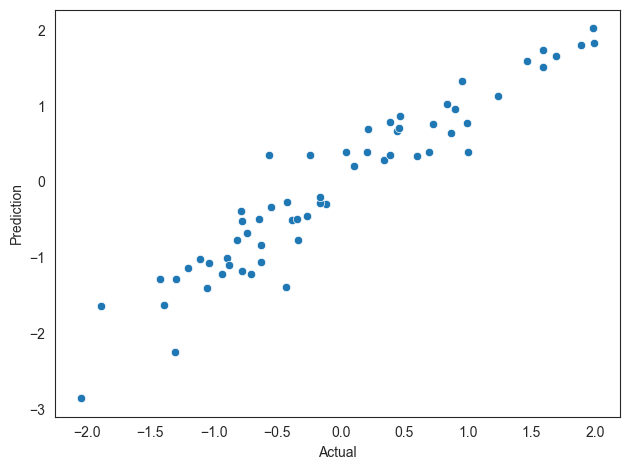

RMSE : 0.33974494971093816


In [95]:
ridge = Ridge(**best_params_ridge_lr)
ridge.fit(X_train,y_train)

y_pred_ridge = ridge.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred_ridge)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.tight_layout()
plt.show()

rmse_test_ridge = np.sqrt(mean_squared_error(y_pred_ridge, y_test))
print(f'RMSE : {rmse_test_ridge}')

### Ridge Polynomial Regression

In [96]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import optuna

def objective(trial):
    params = {
        "alpha" : trial.suggest_float('alpha',0,100),
        'max_iter' : 1000,
        'solver' : 'lsqr'
    }

    ridge = Ridge(**params)
    ridge.fit(X_poly, y_boxcox)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_scores = np.sqrt(-cross_val_score(ridge, X_poly, y_boxcox, cv=kfold, scoring='neg_mean_squared_error'))
    return rmse_scores.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)
best_params_ridge_lr_poly = study.best_params
best_params_ridge_lr_poly

[I 2024-01-08 17:30:10,775] A new study created in memory with name: no-name-c1e293bd-5e37-4ecc-aa85-561a0541660b
[I 2024-01-08 17:30:11,784] Trial 0 finished with value: 0.35971793551394143 and parameters: {'alpha': 32.2338697753055}. Best is trial 0 with value: 0.35971793551394143.
[I 2024-01-08 17:30:12,774] Trial 1 finished with value: 0.35971793551394143 and parameters: {'alpha': 32.502166574881095}. Best is trial 0 with value: 0.35971793551394143.
[I 2024-01-08 17:30:13,774] Trial 2 finished with value: 0.3597179355139419 and parameters: {'alpha': 92.40176528842755}. Best is trial 0 with value: 0.35971793551394143.
[I 2024-01-08 17:30:14,816] Trial 3 finished with value: 0.35971793551394177 and parameters: {'alpha': 69.52651043212761}. Best is trial 0 with value: 0.35971793551394143.
[I 2024-01-08 17:30:16,325] Trial 4 finished with value: 0.35971793551394143 and parameters: {'alpha': 34.733963880621786}. Best is trial 0 with value: 0.35971793551394143.
[I 2024-01-08 17:30:17,463

{'alpha': 1.8995240732827625}

In [97]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

ridge = Ridge(**best_params_ridge_lr_poly, solver='lsqr')
ridge.fit(X_poly,y_boxcox)

kfold = KFold(n_splits=4, shuffle=True, random_state=42)
rmse_scores_ridge_poly = np.sqrt(-cross_val_score(ridge, X_poly, y_boxcox, cv=kfold, scoring='neg_mean_squared_error'))
ridge_poly_r2 = ridge.score(X_poly,y_boxcox)
print("R^2: ", ridge_poly_r2)
print("RMSE scores:", rmse_scores_ridge_poly)
print("Mean RMSE:", rmse_scores_ridge_poly.mean())

R^2:  0.9138292531098229
RMSE scores: [0.32800631 0.35200752 0.36296785 0.40833523]
Mean RMSE: 0.36282922832581854


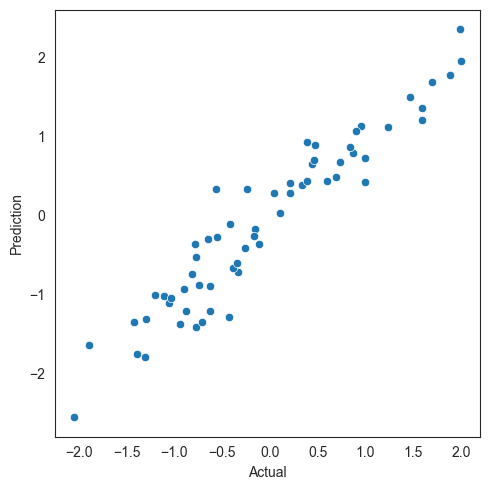

RMSE : 0.32773604480047663


In [116]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

ridge = Ridge(**best_params_ridge_lr_poly, solver='lsqr')
ridge.fit(X_poly_train,y_train)

y_pred_poly_rg = ridge.predict(X_poly_test)

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test,y=y_pred_poly_rg)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.tight_layout()
plt.show()

rmse_test_ridge_poly = np.sqrt(mean_squared_error(y_pred_poly_rg, y_test))
print(f'RMSE : {rmse_test_ridge_poly}')

### ElasticNet

In [99]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import optuna

def objective(trial):
    params = {
        "alpha" : trial.suggest_float('alpha',0,100),
        'max_iter' : 1000,
        'l1_ratio' : trial.suggest_float('l1_ratio',0,1)
    }

    elastic = ElasticNet(**params)
    elastic.fit(X, y_boxcox)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_scores = np.sqrt(-cross_val_score(elastic, X, y_boxcox, cv=kfold, scoring='neg_mean_squared_error'))
    return rmse_scores.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)
best_params_elastic = study.best_params
best_params_elastic

[I 2024-01-08 17:46:29,195] A new study created in memory with name: no-name-c311b374-06a3-4a40-a126-36032ac63c54
[I 2024-01-08 17:46:29,251] Trial 0 finished with value: 0.4434824758467716 and parameters: {'alpha': 42.30006279277948, 'l1_ratio': 0.7366779482330935}. Best is trial 0 with value: 0.4434824758467716.
[I 2024-01-08 17:46:29,292] Trial 1 finished with value: 0.4414501688743154 and parameters: {'alpha': 89.62410209334429, 'l1_ratio': 0.3099187529177868}. Best is trial 1 with value: 0.4414501688743154.
[I 2024-01-08 17:46:29,317] Trial 2 finished with value: 0.43950409542611546 and parameters: {'alpha': 97.71542976354657, 'l1_ratio': 0.2452487914758118}. Best is trial 2 with value: 0.43950409542611546.
[I 2024-01-08 17:46:29,350] Trial 3 finished with value: 0.4396031774928007 and parameters: {'alpha': 53.3378938894452, 'l1_ratio': 0.4539270053469958}. Best is trial 2 with value: 0.43950409542611546.
[I 2024-01-08 17:46:29,382] Trial 4 finished with value: 0.4673385221409448 

{'alpha': 0.007972184720447488, 'l1_ratio': 0.316711512080725}

In [100]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

elastic = ElasticNet(**best_params_elastic)
elastic.fit(X,y_boxcox)

kfold = KFold(n_splits=4, shuffle=True, random_state=42)
rmse_scores_elastic = np.sqrt(-cross_val_score(elastic, X, y_boxcox, cv=kfold, scoring='neg_mean_squared_error'))
elastic_r2 = elastic.score(X,y_boxcox)
print("R^2: ", elastic_r2)
print("RMSE scores:", rmse_scores_elastic)
print("Mean RMSE:", rmse_scores_elastic.mean())

R^2:  0.9198298792982058
RMSE scores: [0.34684147 0.35535837 0.3456632  0.33798389]
Mean RMSE: 0.34646173340606884


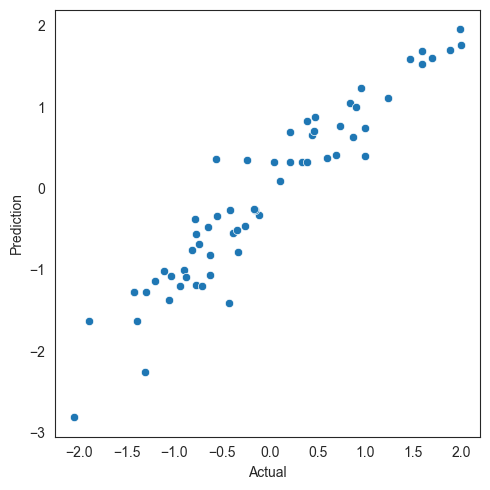

RMSE : 0.3374714706015728


In [117]:
elastic = ElasticNet(**best_params_elastic)
elastic.fit(X_train,y_train)

y_pred_elastic = elastic.predict(X_test)

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test,y=y_pred_elastic)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.tight_layout()
plt.show()

rmse_test_elastic = np.sqrt(mean_squared_error(y_pred_elastic, y_test))
print(f'RMSE : {rmse_test_elastic}')

### Elastic Polynomial

In [102]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import optuna

def objective(trial):
    params = {
        "alpha" : trial.suggest_float('alpha',0,100),
        'max_iter' : 1000,
        'l1_ratio' : trial.suggest_float('l1_ratio',0,1)
    }

    elastic = ElasticNet(**params)
    elastic.fit(X_poly, y_boxcox)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_scores = np.sqrt(-cross_val_score(elastic, X_poly, y_boxcox, cv=kfold, scoring='neg_mean_squared_error'))
    return rmse_scores.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
best_params_elastic_poly = study.best_params
best_params_elastic_poly

[I 2024-01-08 17:47:22,100] A new study created in memory with name: no-name-af72373d-dcb8-44a1-aef2-a651561cffcd
C:\Users\zidan\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.937e+00, tolerance: 2.050e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\zidan\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.425e+00, tolerance: 1.649e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\zidan\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did

{'alpha': 54.964619082268285, 'l1_ratio': 0.8418943037846904}

In [103]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

elastic = ElasticNet(**best_params_elastic_poly)
elastic.fit(X_poly,y_boxcox)

kfold = KFold(n_splits=4, shuffle=True, random_state=42)
rmse_scores_elastic_poly = np.sqrt(-cross_val_score(elastic, X_poly, y_boxcox, cv=kfold, scoring='neg_mean_squared_error'))
elastic_poly_r2 = elastic.score(X_poly,y_boxcox)
print("R^2: ", elastic_poly_r2)
print("RMSE scores:", rmse_scores_elastic_poly)
print("Mean RMSE:", rmse_scores_elastic_poly.mean())

C:\Users\zidan\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.884e+00, tolerance: 2.050e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\zidan\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.124e+00, tolerance: 1.545e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\zidan\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

R^2:  0.9711672132689552
RMSE scores: [0.76238423 0.43533113 0.46720449 0.87357962]
Mean RMSE: 0.634624867458729


C:\Users\zidan\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.448e+00, tolerance: 1.451e-02
  model = cd_fast.enet_coordinate_descent(


C:\Users\zidan\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.887e+00, tolerance: 1.434e-02



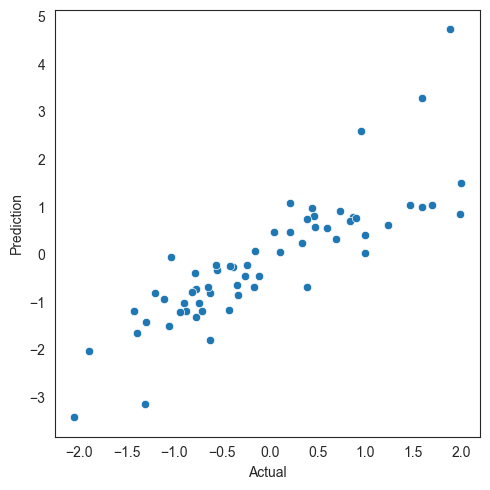

RMSE : 0.7116338544495328


In [118]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

elastic = ElasticNet(**best_params_elastic_poly)
elastic.fit(X_poly_train,y_train)

y_pred_elastic_poly = elastic.predict(X_poly_test)

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test,y=y_pred_elastic_poly)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.tight_layout()
plt.show()

rmse_test_elastic_poly = np.sqrt(mean_squared_error(y_pred_elastic_poly, y_test))
print(f'RMSE : {rmse_test_elastic_poly}')

# Evaluation

In [105]:
from sklearn.preprocessing import StandardScaler

labelsvis = pd.DataFrame(y_test, columns=['Price'])
labelsvis['col'] = 1

df_y_lr = pd.DataFrame(y_pred_lr, columns=['Price'])
df_y_lr['col'] = 2

df_y_lasso = pd.DataFrame(y_pred_lasso, columns=['Price'])
df_y_lasso['col'] = 3

df_y_ridge = pd.DataFrame(y_pred_ridge, columns=['Price'])
df_y_ridge['col'] = 4

df_y_elastic = pd.DataFrame(y_pred_elastic, columns=['Price'])
df_y_elastic['col'] = 5

df_y_lr_poly = pd.DataFrame(y_pred_poly, columns=['Price'])
df_y_lr_poly['col'] = 6

df_y_lasso_poly = pd.DataFrame(y_pred_poly_ls, columns=['Price'])
df_y_lasso_poly['col'] = 7

df_y_ridge_poly = pd.DataFrame(y_pred_poly_rg, columns=['Price'])
df_y_ridge_poly['col'] = 8

df_y_elastic_poly = pd.DataFrame(y_pred_elastic_poly, columns=['Price'])
df_y_elastic_poly['col'] = 9

combined_vis = pd.concat([labelsvis, df_y_lr,
                          df_y_lasso, df_y_ridge,
                          df_y_elastic, df_y_lr_poly,
                          df_y_lasso_poly, df_y_ridge_poly,
                          df_y_elastic_poly], axis=0)
combined_vis['Price'] = pd.to_numeric(combined_vis['Price'], errors='coerce')
combined_vis['col'] = combined_vis['col'].astype(int)
combined_vis


,Price,col
0,1.689847,1
1,0.956091,1
2,-0.265853,1
3,0.210730,1
4,1.590762,1
...,...,...
57,0.483890,9
58,4.729561,9
59,-2.031368,9
60,-0.630748,9


In [106]:
import plotly.figure_factory as ff

grouped_combined_vis = [combined_vis[combined_vis['col'] == col]['Price'] for col in combined_vis['col'].unique()]
group_labels = ['Actual', 'Baseline Linear Regression',
                'LASSO Regression', 'Ridge Regression', 'Elastic Net',
                'Polynomial Linear Regression','Polynomial LASSO Regression',
                'Polynomial Ridge Regression', 'Polynomial Elastic Net']
# Create a distplot using Plotly
fig = ff.create_distplot(
    grouped_combined_vis, 
    group_labels, 
    colors=['blue', 'red', 'green', 'orange', 'cyan',
            'red', 'green', 'orange', 'cyan'], 
    show_hist=False
)

# Update layout settings if needed
fig.update_layout(
    title='Distribution Plot',
    xaxis_title='Price',
    yaxis_title='Density'
)

# Show the plot
fig.show()

In [107]:
import plotly.graph_objects as go

# Create a scatter plot using Plotly
scatter_traces = []
for i, col in enumerate(combined_vis['col'].unique()):
    trace = go.Scatter(
        x=combined_vis[combined_vis['col'] == col]['Price'],
        y=combined_vis[combined_vis['col'] == 1]['Price'],
        mode='markers',
        name=group_labels[i],
        marker=dict(color=['blue', 'red', 'green', 'orange', 'cyan',
                           'red', 'green', 'orange', 'cyan'][i])
    )
    scatter_traces.append(trace)

# Create layout settings
layout = go.Layout(
    title='Scatter Plot',
    xaxis=dict(title='Actual'),
    yaxis=dict(title='Prediction'),
)

# Create the figure and add traces
fig = go.Figure(data=scatter_traces, layout=layout)

# Show the plot
fig.show()


In [108]:
result = pd.DataFrame({'Method' : ['Baseline Linear Regression',
                                    'Polynomial Linear Regression',
                                    'LASSO Regression'
                                    ,'Polynomial LASSO Regression',
                                    'Ridge Regression',
                                    'Polynomial Ridge Regression',
                                    'Elastic Net',
                                    'Polynomial Elastic Net'],
                       'CV RMSE Mean' : [rmse_scores_lr.mean(),
                                 rmse_scores_poly.mean(),
                                 rmse_scores_lasso.mean(),
                                 rmse_scores_lasso_poly.mean(),
                                 rmse_scores_ridge.mean(),
                                 rmse_scores_ridge_poly.mean(),
                                 rmse_scores_elastic.mean(),
                                 rmse_scores_elastic_poly.mean()],
                        'RMSE Testing Data' : [rmse_test_lr,
                                 rmse_test_poly,
                                 rmse_test_lasso,
                                 rmse_test_lasso_poly,
                                 rmse_test_ridge,
                                 rmse_test_ridge_poly,
                                 rmse_test_elastic,
                                 rmse_test_elastic_poly],
                        'R^2' : [lr_r2,
                                 lr_poly_r2,
                                 lasso_r2,
                                 lasso_poly_r2,
                                 ridge_r2,
                                 ridge_poly_r2,
                                 elastic_r2,
                                 elastic_poly_r2],})

result

,Method,CV RMSE Mean,RMSE Testing Data,R^2
0,Baseline Linear Regression,0.373891,0.368481,0.927310
1,Polynomial Linear Regression,45953.692406,156560.936603,0.995745
2,LASSO Regression,0.345197,0.333989,0.919076
3,Polynomial LASSO Regression,0.634506,0.711554,0.971162
4,Ridge Regression,0.351830,0.339745,0.924333
5,Polynomial Ridge Regression,0.362829,0.327736,0.913829
6,Elastic Net,0.346462,0.337471,0.919830
7,Polynomial Elastic Net,0.634625,0.711634,0.971167


In [109]:
result.style.highlight_min(subset=['CV RMSE Mean','RMSE Testing Data']).highlight_max(subset='R^2')

,Method,CV RMSE Mean,RMSE Testing Data,R^2
0,Baseline Linear Regression,0.373891,0.368481,0.927310
1,Polynomial Linear Regression,45953.692406,156560.936603,0.995745
2,LASSO Regression,0.345197,0.333989,0.919076
3,Polynomial LASSO Regression,0.634506,0.711554,0.971162
4,Ridge Regression,0.351830,0.339745,0.924333
5,Polynomial Ridge Regression,0.362829,0.327736,0.913829
6,Elastic Net,0.346462,0.337471,0.919830
7,Polynomial Elastic Net,0.634625,0.711634,0.971167


In [110]:
result.sort_values(by=['CV RMSE Mean','RMSE Testing Data'], ascending=True)

,Method,CV RMSE Mean,RMSE Testing Data,R^2
2,LASSO Regression,0.345197,0.333989,0.919076
6,Elastic Net,0.346462,0.337471,0.919830
4,Ridge Regression,0.351830,0.339745,0.924333
5,Polynomial Ridge Regression,0.362829,0.327736,0.913829
0,Baseline Linear Regression,0.373891,0.368481,0.927310
3,Polynomial LASSO Regression,0.634506,0.711554,0.971162
7,Polynomial Elastic Net,0.634625,0.711634,0.971167
1,Polynomial Linear Regression,45953.692406,156560.936603,0.995745
